In [27]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [28]:
# load JSON file
with open("actual_prediction.json", "r") as json_file:
    data = json.load(json_file)

# create lists from JSON data
actual = [d['actual'] for d in data]
predicted = [d['predicted'] for d in data]


In [33]:
cm = confusion_matrix(actual, predicted)
cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=4)

print(cm_norm)

[[0.73 0.02 0.11 0.01 0.   0.02 0.05 0.   0.01 0.05]
 [0.   0.93 0.01 0.   0.   0.03 0.   0.   0.   0.02]
 [0.05 0.04 0.69 0.03 0.   0.04 0.   0.01 0.01 0.13]
 [0.03 0.02 0.03 0.66 0.02 0.   0.03 0.1  0.02 0.1 ]
 [0.06 0.   0.02 0.09 0.54 0.   0.05 0.09 0.13 0.01]
 [0.02 0.11 0.06 0.01 0.   0.74 0.   0.   0.01 0.05]
 [0.02 0.   0.03 0.02 0.02 0.01 0.82 0.   0.   0.09]
 [0.   0.   0.04 0.06 0.02 0.01 0.   0.81 0.02 0.05]
 [0.02 0.   0.06 0.07 0.1  0.   0.   0.04 0.63 0.08]
 [0.04 0.01 0.13 0.08 0.   0.05 0.05 0.03 0.01 0.6 ]]


In [34]:
mapping= [
        "Blues",
        "Classical",
        "Country",
        "Disco",
        "Hiphop",
        "Jazz",
        "Metal",
        "Pop",
        "Reggae",
        "Rock"
    ]

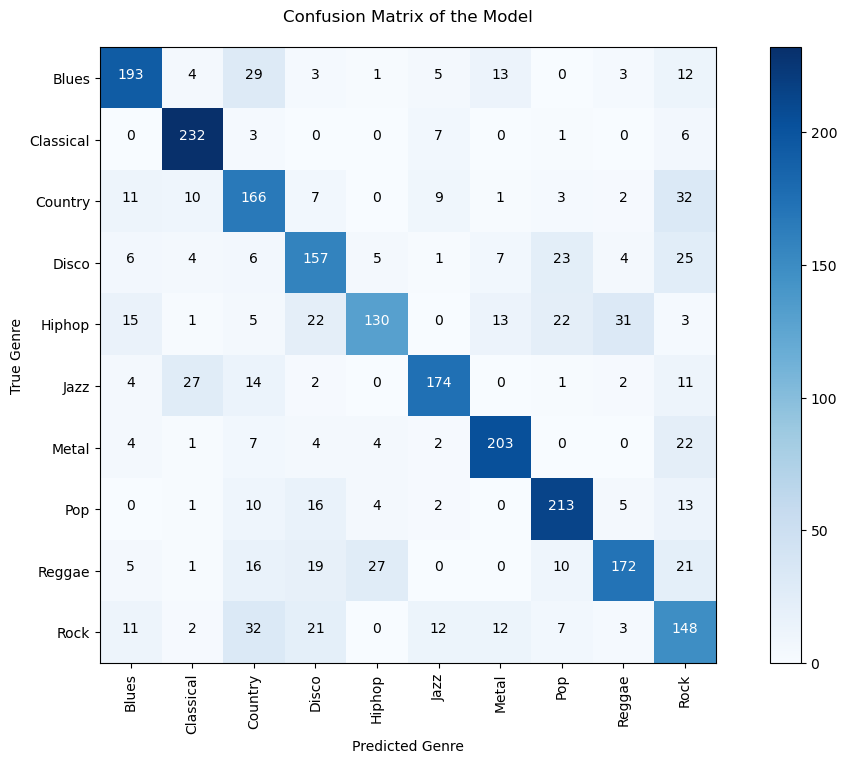

In [37]:
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model\n')
plt.colorbar()
# Add labels to cells
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Add axis labels
pos = range(len(mapping))
plt.xticks(pos, mapping, rotation=90)
plt.yticks(pos, mapping)
plt.ylabel('True Genre')
plt.xlabel('Predicted Genre')

# Show plot
plt.gcf().set_size_inches(14,8)
plt.show()


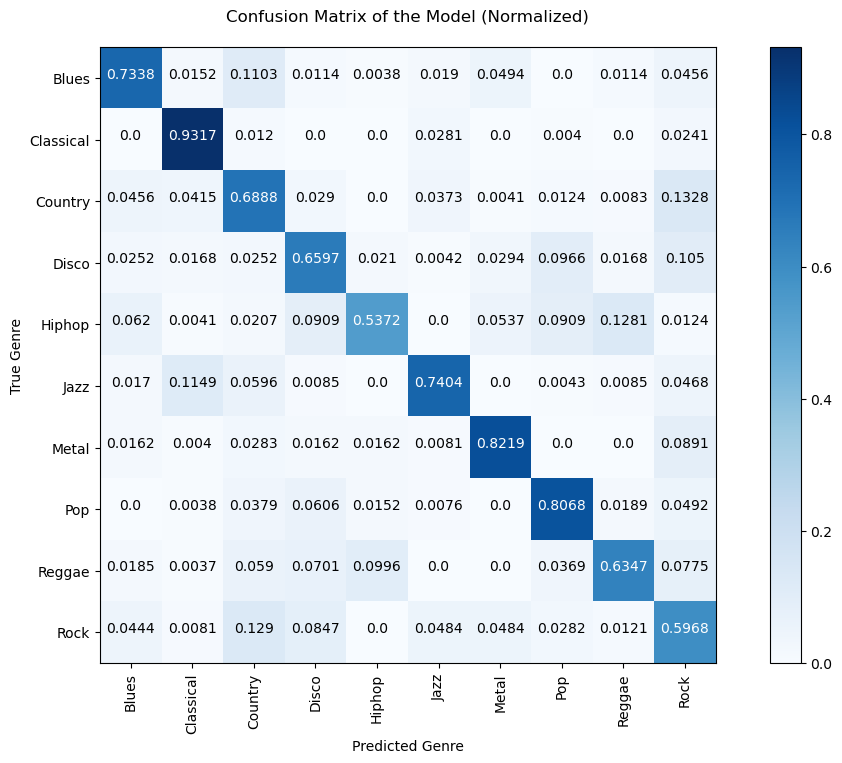

In [38]:
# Plot confusion matrix
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model (Normalized)\n')
plt.colorbar()
# Add labels to cells
thresh = cm_norm.max() / 2.
for i, j in itertools.product(range(cm_norm.shape[0]), range(cm_norm.shape[1])):
    plt.text(j, i, cm_norm[i, j],
             horizontalalignment="center",
             color="white" if cm_norm[i, j] > thresh else "black")

# Add axis labels
pos = range(len(mapping))
plt.xticks(pos, mapping, rotation=90)
plt.yticks(pos, mapping)
plt.ylabel('True Genre')
plt.xlabel('Predicted Genre')

# Show plot
plt.gcf().set_size_inches(14,8)
plt.show()
